In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame, read_csv 
import scipy.stats as stats

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
def load_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # covert each item of release_date to datetime.date type entity
    #df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    # all json columns`
    json_columns = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']
    for column in json_columns:
        # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

In [5]:
path_to_file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
data = pd.read_table(path_to_file,encoding="utf-8")                          #Reading csv data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
data.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
data['Y'].mean()                           #Mean of target output

152.13348416289594

In [8]:
data['Y'].median()                         #Median of target output

140.5

In [9]:
data['Y'].mode()                          #Mode of target output

0     72
1    200
dtype: int64

In [10]:
data['Y'].describe()                      #Dispersion of data

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


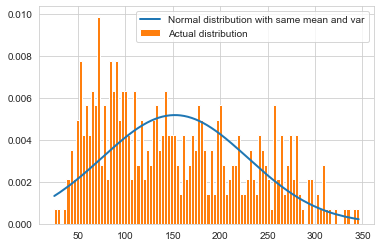

In [11]:

h = np.asarray(data['Y'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [12]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'AGE': rng.rand(55),
                   'BMI': rng.rand(55),                    #grouping of age,bmi and bp
                   'BP': rng.rand(55)})
df

,AGE,BMI,BP
0,0.374540,0.921874,0.289751
1,0.950714,0.088493,0.161221
2,0.731994,0.195983,0.929698
3,0.598658,0.045227,0.808120
4,0.156019,0.325330,0.633404
5,0.155995,0.388677,0.871461
6,0.058084,0.271349,0.803672
7,0.866176,0.828738,0.186570
8,0.601115,0.356753,0.892559
9,0.708073,0.280935,0.539342


In [13]:
df.mean()                                #Mean of all factors of age, BMI, BP

AGE    0.481330
BMI    0.448441
BP     0.499361
dtype: float64

In [14]:
df.median()                              #Median of all factors of age, BMI, BP

AGE    0.495177
BMI    0.410383
BP     0.497249
dtype: float64

In [15]:
df.mode()                               #Mode of all factors of age, BMI, BP

,AGE,BMI,BP
0,0.020584,0.005522,0.006952
1,0.034389,0.025419,0.036887
2,0.046450,0.031429,0.051479
3,0.058084,0.045227,0.090290
4,0.065052,0.063558,0.110052
5,0.097672,0.074045,0.119865
6,0.122038,0.074551,0.144895
7,0.139494,0.076980,0.161221
8,0.155995,0.088493,0.186570
9,0.156019,0.107891,0.222108


In [16]:
df.describe()

,AGE,BMI,BP
count,55.000000,55.000000,55.000000
mean,0.481330,0.448441,0.499361
std,0.300342,0.293177,0.293069
min,0.020584,0.005522,0.006952
25%,0.192264,0.197349,0.246919
50%,0.495177,0.410383,0.497249
75%,0.720033,0.729307,0.782646
max,0.969910,0.986887,0.985650


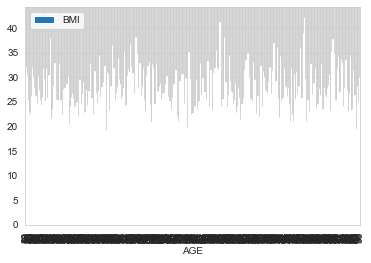

In [17]:
data.plot(x='AGE', y='BMI', kind='bar')                  #plotting of age versus bmi
plt.show()

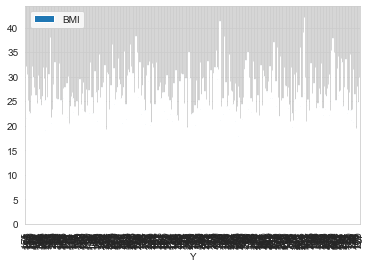

In [18]:
data.plot(x='Y', y='BMI', kind='bar')                          #plotting of Y versus BMI
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression             #Importing linear regression

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import seaborn as sns

In [20]:
X=data.drop('Y', axis=1)                        #Determining X variables for intercept
lr= LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.fit(X, data.Y)                              #Fitting of data
print( data.Y)

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64


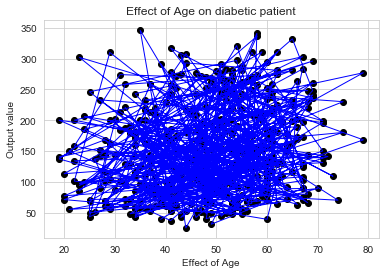

In [22]:
plt.scatter(data.AGE, data.Y, color='black')

plt.plot(data.AGE, data.Y, color='blue', linewidth='1')
plt.xlabel("Effect of Age")                                      #Plotting of independent and dependent variable with the use of scatter and line
plt.ylabel("Output value")

plt.title("Effect of Age on diabetic patient")
plt.show()

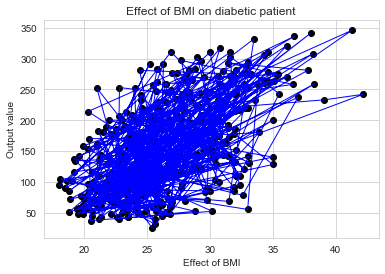

In [23]:
plt.scatter(data.BMI, data.Y, color='black')
plt.plot(data.BMI, data.Y, color='blue', linewidth='1')
plt.xlabel("Effect of BMI")
plt.ylabel("Output value")

plt.title("Effect of BMI on diabetic patient")
plt.show()

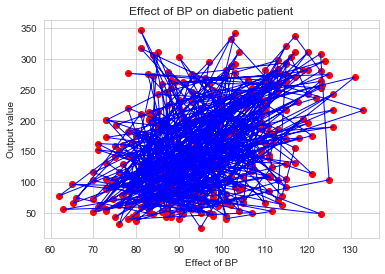

In [24]:
plt.scatter(data.BP, data.Y, color='red')
plt.plot(data.BP, data.Y, color='blue', linewidth='1')
plt.xlabel("Effect of BP")
plt.ylabel("Output value")

plt.title("Effect of BP on diabetic patient")
plt.show()

In [25]:
lr = LinearRegression()
lr.fit(X[['BMI']],data.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
mseBMI = np.mean((data.Y - lr.predict(X[['BMI']]))**2)                #calculating mse for one predicted value
print("Mean squared error for one predicted value is: ", mseBMI)             

Mean squared error for one predicted value is:  3890.4565854612742
